In [ ]:
# Introduction
Basic statistic for beginners
* [Histogram](#1)
* [Outliers](#2)
* [Box Plot ](#3)
* [Summary Statistics](#4)
* [CDF](#5)
* [Effect size](#6)
* [Relationship Between Variables](#7)
* [Correlation](#8)
* [Covariance](#9)
* [Pearson Correlation](#10)
* [Spearman's Rank Correlation](#11)
* [Mean VS Median](#12)
* [Hypothesis Testing](#13)
* [Normal(Gaussian) Distribution and z-score](#14) 


In [ ]:
분류와 회귀중 회귀에 관한 것은 미래에 예측을 할수 있는것
피처에 쓰지 않는경우는 상관관계가 너무 높거나 train데이타에만 속해 있거나
한쪽에 너무 치중된 데이터는 조정해줘야 한다(즉 outlier 데이터를 제거한다)


In [ ]:
참조 : https://github.com/amueller/odscon-2015

In [ ]:
Feature Engineering
신호와 잡음을 구분해야 한다
피처가 많다고해서 무조건 좋은 성능을 내지 않는다
피처를 하나씩 추가하고 변경해서 성능이 좋지 않은 피처는 제거하도록 한다
연속형 feature와 범주형 feature
범주형 feature의 타입은 category로 변경하여준다

In [ ]:
score
Rmsle
과대평가된 항목보다는 과소 평가된 항목에 패널티를 준다
오차(error)를 제곱(square)해서 평균(mean)한 제곱근(root)으로 값이 작을수록 정밀도가 높다
0에 가까운 값이 나올수록 정밀도가 높은 값이다.


In [2]:
!pip install pandas

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import plotting
from scipy import stats
plt.style.use("ggplot") # 그래프에서 격자로 숫자범위가 눈에 잘띄도록 하기위해서 ggplot 씀
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

import os
print(os.listdir("./input"))

['column_2C_weka.csv', 'column_3C_weka.csv', 'combats.csv', 'MedianHouseholdIncome2015.csv', 'PercentagePeopleBelowPovertyLevel.csv', 'PercentOver25CompletedHighSchool.csv', 'pokemon.csv', 'PoliceKillingsUS.csv', 'ShareRaceByCity.csv', 'tests.csv', 'voice.csv']


In [12]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [ ]:
#자료참조 : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [ ]:
특징은 유방 종괴의 미세 바늘 흡인 (FNA)의 디지털화 된 이미지로부터 계산됩니다. 
그들은 이미지에 존재하는 세포핵의 특성을 기술합니다. 
3 차원 공간은 [K. P. Bennett and O. L. Mangasarian : "두 개의 선형 적으로 분리 할 수없는 세트의 견고한 선형 프로그래밍 판별",
Optimization Methods and Software 1, 1992, 23-34].

In [13]:
# read data as pandas data frame
data = pd.read_csv("./input/data.csv")
data = data.drop(['Unnamed: 32','id'],axis = 1)

In [14]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
data.shape

(569, 31)

In [16]:
data.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
Histogram
각 값이 데이터 집합에 나타나는 횟수입니다. 이 설명을 변수 분포라고합니다.
varible 분포를 표현하는 가장 일반적인 방법은 각 값의 빈도를 보여주는 그래프 인 히스토그램입니다.
빈도 = 각 값이 나타나는 횟수
예 : [1,1,1,1,2,2,2]. 1의 빈도는 4이고 빈도는 2입니다.

SyntaxError: invalid syntax (<ipython-input-17-625b4a6e5760>, line 2)

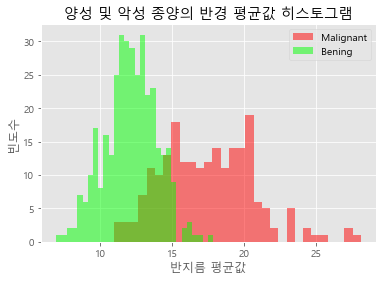

가장 빈번한 악성 반경 평균은:  20.101999999999997


In [19]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("반지름 평균값")
plt.ylabel("빈도수")
plt.title("양성 및 악성 종양의 반경 평균값 히스토그램")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("가장 빈번한 악성 반경 평균은: ",most_frequent_malignant_radius_mean)

다른 결론들도 보자.
이 그래프에서 악성 종양의 반경 평균은 대부분 종양의 종양의 반경 평균보다 크다는 것을 알 수 있습니다.
베닝 분포 (그래프에서 녹색)는 정규 분포 (가우시안 분포)의 형태 인 대략 종형이며,
또한 가장 빈번한 악성 반경 평균과 같은 결과를 찾을 수 있습니다.

In [ ]:
Outliers
yok가 볼 수있는 바와 같이 히스토그램을 보는 동안 베닝 분포 (그래프에서 녹색)
이 값에는 오류 또는 드문 이벤트가있을 수 있습니다.
이러한 오류 및 희귀 한 이벤트는 특이 치를 호출 할 수 있습니다.
이상 값 계산 :
먼저 1 분위 (Q1) (25 %)를 계산해야합니다.
IQR (사 분위수 범위) = Q3-Q1
마지막으로 Q1 - 1.5IQR 및 Q3 + 1.5IQR을 계산하십시오.
이 범위 밖의 값은 이상 값입니다.
특징 반경 평균에 대한 종양 분포를 베닝하기위한 코드 작성

In [21]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


In [22]:
Box Plot
상자 외곽선에서도 이상 값을 볼 수 있습니다.
반경 평균값에서 3 이상치가 발견되었고 상자 플롯에서 3 이상치가 있습니다.

SyntaxError: invalid syntax (<ipython-input-22-8e480e7b9cde>, line 1)

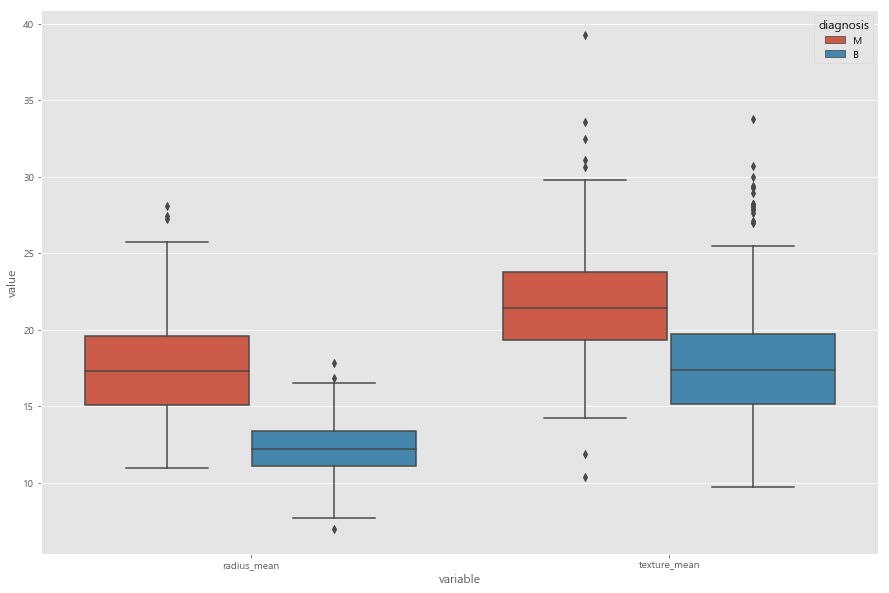

In [23]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [24]:
Summary Statistics
평균
분산 : 분포의 분산
표준 편차 평방근 분산
양성 종양 복사 평균의 요약 통계를 살펴 봅니다.

SyntaxError: invalid syntax (<ipython-input-24-5fa1d5bbf172>, line 1)

In [26]:
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("표준 편차 (표준): ",data_bening.radius_mean.std())
print("기술 방법: ",data_bening.radius_mean.describe())

mean:  12.14652380952381
variance:  3.170221722043872
표준 편차 (표준):  1.7805116461410389
기술 방법:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


In [ ]:
CDF
누적 분포 함수는 변수가 x보다 작거나 같은 값을 취할 확률입니다. P (X≤x)
방열 평균의 cdf 그래프에서 설명 할 수 있습니다.
그래프에서 P (12 <X)는 무엇입니까? 대답은 0.5입니다.
변수가 12보다 작거나 같은 값 (반경 평균)을 가질 확률은 0.5입니다.
두 가지 다른 방법으로 cdf를 플로팅 할 수 있습니다.

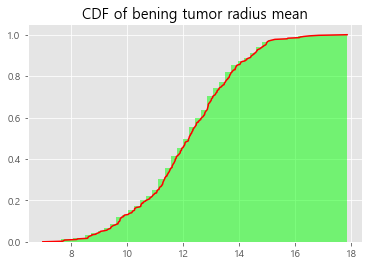

In [27]:
plt.hist(data_bening.radius_mean,bins=50,fc=(0,1,0,0.5),label='Bening',normed = True,cumulative = True)
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('양성 종양 반경 평균 CDF')
plt.show()

In [ ]:
Effect size
요약 통계 중 하나.
효과의 크기를 설명합니다. 그것은 두 그룹 간의 차이를 정량화하는 간단한 방법입니다.
다른 말로, 효과 크기는 차이의 크기를 강조합니다
코헨 효과 크기 사용
Cohen은 d (효과 크기) = 0.2이면 작은 효과 크기, d = 0.5 중간 효과 크기, d = 0.8 큰 효과 크기라고 제안합니다.
베닝 반경 평균과 악성 반경 평균 사이의 효과 크기 비교
효과 크기는 2.2이며 너무 커서 우리가 예상 한대로 두 그룹이 서로 다르다고합니다. 
우리 그룹은 반경 평균과 악성 반경 평균이 서로 다르기 때문에

In [ ]:
mean_diff = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean()
var_bening = data_bening.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

In [ ]:
Relationship Between Variables
우리는 두 변수가 서로 관련이 있다고 말할 수 있는데, 그 중 하나가 다른 변수에 대한 정보를 제공한다면
예 : 가격 및 거리. 택시로 장거리를 가면 더 많이 지불하게됩니다. 
우리는 가격과 거리가 서로 긍정적 인 관계가 있다고 말할 수 있습니다.

산포도
두 변수 간의 관계를 확인하는 가장 간단한 방법
반지름 평균과 면적 평균 사이의 관계를 살펴 봅니다.
분산 형 플롯에서 반경 평균이 증가하면 면적 평균도 증가한다는 것을 알 수 있습니다. 
따라서 서로 긍정적 인 상관 관계가 있습니다.
면적 평균과 프랙탈 차원 간의 상관 관계는 없습니다. 
면적 평균이 변할 때 프랙탈 차원 se는 면적 평균의 기회에 영향을받지 않기 때문에

<Figure size 1080x720 with 0 Axes>

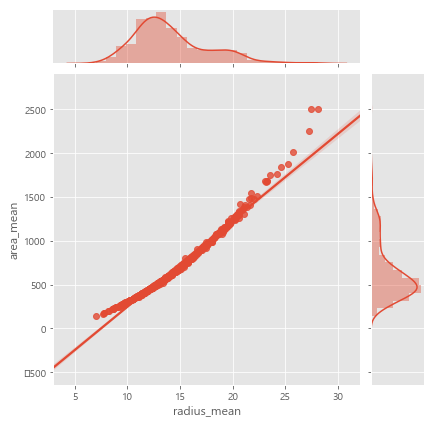

In [28]:
plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean,data.area_mean,kind="regg")
plt.show()

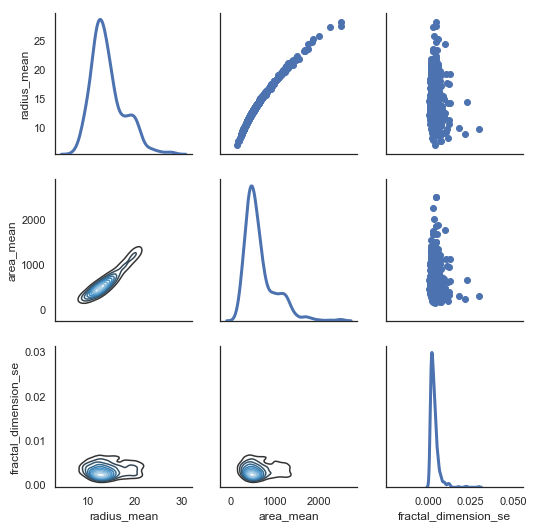

In [29]:
# 또한 우리는 2 개 이상의 분포 사이의 관계를 볼 수 있습니다.
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

In [ ]:
Correlation
두 변수 사이의 관계 강도
모든 기능 간의 상관 관계를 살펴 봅니다.

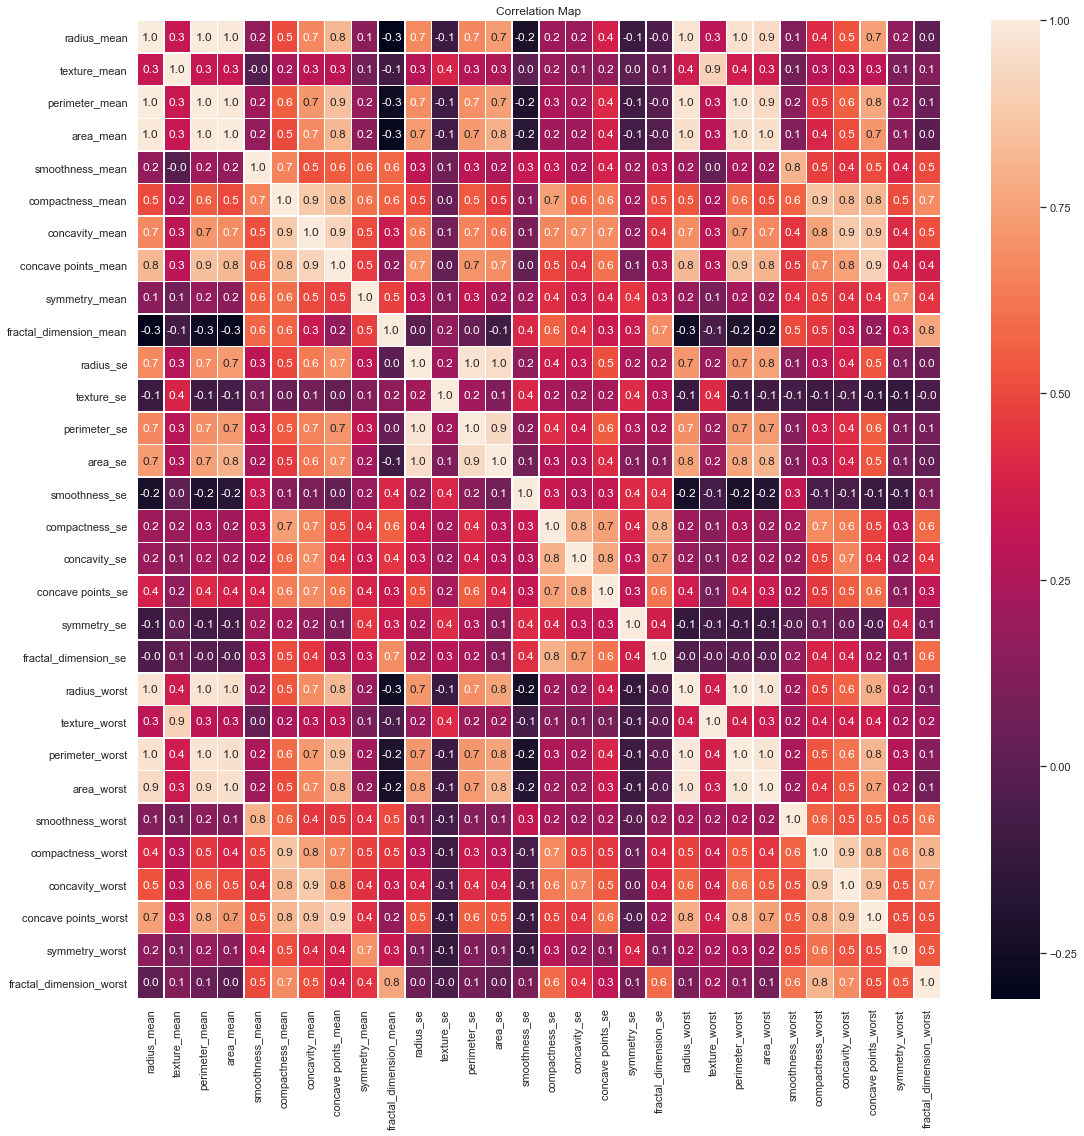

In [30]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [ ]:
숫자가 많은 거대한 행렬
이 숫자의 범위는 -1에서 1 사이입니다.
1의 의미는 반경 평균과 면적 평균과 같이 서로 양의 상관 관계가 있습니다
0의 의미는 반지름 평균과 프랙탈 차원 se와 같은 변수간에 상관 관계가 없다는 것입니다.
-1이라는 의미는 반경 평균과 프랙탈 차원 평균과 같이 두 변수가 서로 음의 상관 관계가 있음을 의미합니다. 
실제로 이들 사이의 상관 관계는 -1이 아니며 -0.3이지만 상관 관계의 부호가 음수이면 해당되는 것을 의미합니다. 
는 음의 상관 관계입니다.

In [ ]:
Covariance
공분산은 두 변수가 함께 변하는 경향을 측정 한 것입니다.
두 벡터가 동일하면 공분산이 최대화됩니다.
공변량이 직각이면 공분산은 제로입니다.
공역 (Covariance)은 반대 방향으로 향하면 음수입니다.
반지름 평균과 면적 평균의 공분산을 봅니다. 그런 다음 반경 평균과 프랙탈 차원을 살펴 봅니다.

In [31]:
np.cov(data.radius_mean,data.area_mean)
print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.4834093464565
Covariance between radius mean and fractal dimension se:  -0.0003976248576440626


In [ ]:
Pearson Correlation
변수의 표준 편차에 의한 공분산의 나눗셈
반경 평균과 면적 평균 간의 피어슨 상관 관계를 살펴 봅니다.
먼저 상관 부분에서 실제로 사용한 .corr () 메소드를 사용합니다. 
상관 관계 부분에서 우리는 실제로 피어슨 상관 관계를 사용했습니다 :)
p1과 p2는 같습니다. p1에서는 corr () 메서드를 사용하고,
p2에서는 피어슨 상관 관계 정의 (cov (A, B) / (std (A) * std (B)))를 적용합니다.
area_mean과 area_mean 사이의 피어슨 상관 관계가 1 일 것으로 예상되는 것과 같은 분포이므로
또한 area_mean과 radius_mean 사이의 pearson 상관 관계는 0.98로 서로 긍정적 인 상관 관계가 있고 
그 사이의 관계가 매우 높음을 의미합니다.
상관 관계 부분과 피어슨 상관 관계 부분에서 우리가 한 것을 더 분명히하기 위해 동일합니다.

In [32]:
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566128


In [ ]:
Spearman's Rank Correlation
피어슨 상관 관계는 변수 간의 관계가 선형이고 변수가 대략 정상인 경우 잘 작동합니다. 
그러나 이상 치가있는 경우 견고하지 못합니다.
스피어 만 상관 관계를 계산하려면 각 값의 순위를 계산해야합니다.

In [33]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


In [ ]:
스피 어맨의 상관 관계는 피어슨 상관 관계보다 약간 높습니다.
분포 사이의 관계가 비선형이라면, 스피어 먼의 상관 관계는 관계의 강도를 더 잘 예측하는 경향이 있습니다
피어슨 상관 관계는 특이 치에 의해 영향을받을 수 있습니다. 스피어 먼의 상관 관계는 더욱 강력합니다.

In [ ]:
Mean VS Median
때로는 평균 대신 중앙값을 사용해야합니다. 나는 왜 우리가 예를 들어 중간 값을 사용해야하는지 설명 할 것이다.
한 회사에서 일하는 10 명이 있다고 생각하게합니다. 
회사의 보스는 급여 평균이 5보다 작 으면 급여 인상을 할 것입니다.

In [35]:
salary = [1,4,3,2,5,4,2,3,1,500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


In [ ]:
급여의 평균은 52.5이므로 상사는 직원들에게 많은 봉급을 주었다고 생각합니다. 
그리고 그들의 봉급 인상을하지 마십시오. 그러나 당신이 알고 있듯이 이것은 공정하지 못하며 500 (급여)는이 급여 목록에 대해 이상 값입니다.
중간 값은 특이 치를 피한다.

In [36]:
print("Median of salary: ",np.median(salary))

Median of salary:  3.0


In [ ]:
이제 급여의 중간 값은 3이며 5 미만이며 직원들은 자신의 sallaries를 올리고 행복하며이 상황은 공정합니다.

In [ ]:
Hypothesis Testing
고전 가설 테스트
우리는이 질문에 답하기를 원합니다 : "표본과 뚜렷한 효과가 주어지면 우연히 그러한 효과를 볼 확률은 얼마입니까?"
첫 번째 단계는 테스트 통계를 선택하여 명백한 효과의 크기를 정량화하는 것입니다. 
테스트 통계에 대한 자연스러운 선택은 두 그룹 간의 평균 차이입니다.
두 번째 단계는 명백한 효과가 실제가 아니라는 가정에 기반한 시스템의 모델 인 귀무 가설을 정의하는 것입니다. 
귀무 가설은 주어진 관측 세트에 통계적 유의성이 없음을 제안하는 통계에 사용되는 가설 유형입니다. 
귀무 가설은 사람들이 그것을 가설하려고 시도하는 가설이다. 대체 가설은 사람들이 증명하려고 시도하는 가설이다.
세 번째 단계는 귀무 가설이 사실 일 때 겉보기 효과를 볼 가능성이 높은 p- 값을 계산하는 것입니다. 
귀무 가설 검사가 있다고 가정합니다. 그런 다음 p 값을 계산합니다. p 값이 임계 값보다 작거나 같으면 귀무 가설을 거부합니다.
p 값이 낮 으면이 효과는 통계적으로 의미가 있으며 우연히 발생했을 가능성이 거의 없음을 의미합니다. 
그러므로 우리는 그 영향이 더 큰 집단에 나타날 가능성이 더 많다고 말할 수 있습니다.
예를 들어 보겠습니다. Null 가설 : 세계는 평평하다. 대체 가설 : 세계는 둥글다. 몇몇 과학자들은 귀무 가설을 반증하기 시작했다. 
결국 이것은 귀무 가설의 반박과 대립 가설의 수용으로 이어졌다.
다른 예. "이 효과는 사실입니다"이것은 귀무 가설입니다. 이 가정에 따라 우리는 명백한 효과의 확률을 계산합니다. 
그것은 p- 값입니다. p 값이 낮 으면 귀무 가설이 사실 일 가능성이 낮다고 결론을 내립니다.
이제 예제를 만들 수 있습니다.
나는 반경 평균과 면적 평균이 서로 관련되어 있다는 것을 배우고 싶습니까? 
내 귀무 가설은 "반경 평균과 면적 평균 사이의 관계는 종양 개체군에서 0 임"입니다.
이제 반경 평균과 면적 평균이 관련되어 있음을 입증하기 위해이 귀무 가설을 반박해야합니다. 
(실제로 우리는 이전의 경험에서 그것을 압니다) P 값 (확률 값)

In [37]:
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


In [ ]:
P 값은 거의 0이므로 귀무 가설을 거부 할 수 있습니다.

In [ ]:
Normal(Gaussian) Distribution and z-score
종 모양의 분포라고도합니다.
가우시안 분포를 공식적으로 정의하는 대신, 예제를 통해 설명하고자합니다.
고전적인 예는 가우스가 IQ 점수입니다.
세계에서는 평균 IQ가 110이라고 말할 수 있습니다.
수퍼 지능형이며 IQ가 110보다 높은 사람은 거의 없습니다. 140 또는 150 일 수 있지만 드문 경우입니다.
또한 지능이 낮고 IQ가 110보다 낮은 사람들은 거의 없습니다. 40 또는 50 일 수 있지만 드문 경우입니다.
이 정보들로부터 우리는 IQ의 평균이 110이라고 말할 수 있습니다. 그리고 standart 편차가 20이라고 말할 수 있습니다.
평균 및 표준 편차는 정규 분포의 매개 변수입니다.
100000 샘플을 만들고 히스토그램으로 시각화 할 수 있습니다.

mean:  110.09363256811902
standart deviation:  20.082354915717403


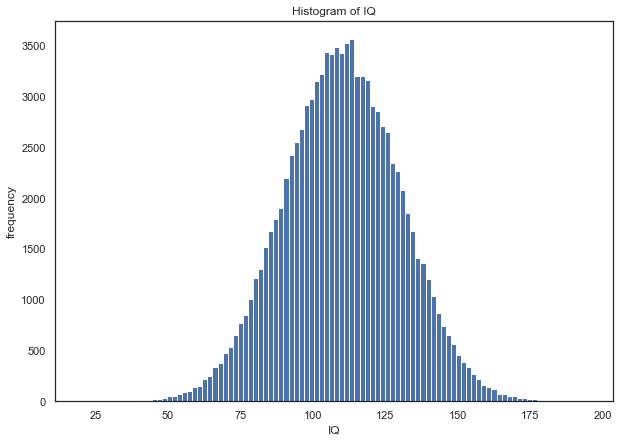

In [38]:
# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, normed=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

In [ ]:
히스토그램에서 볼 수 있듯이 대부분의 사람들은 우리의 정규 분포의 평균 인 110에 가깝게 누적됩니다
그러나 이전 문장에서 언급 한 "가장"무엇입니까? 사람들의 비율이 80에서 140 사이의 IQ 점수를 가져야한다는 것을 알고 싶습니다.
우리는이 질문에 대한 대답 인 z- 점수를 사용할 것입니다.

 
      * z = (x - mean)/std 
      * z1 = (80-110)/20 = -1.5
      * z2 = (140-110)/20 = 1.5
      * mean과 80 사이의 거리는 1.5st이고 mean과 140 사이의 거리는 1.5st입니다.
      * z 표를 보면 1.5std가 0.4332에 해당 함을 알 수 있습니다.
 <a href="https://ibb.co/hys6OT"><img src="https://preview.ibb.co/fYzWq8/123.png" alt="123" border="0"></a>
      * 80에서 1로, 평균에서 140으로, 2로 계산합니다.
      * 0.4332 * 2 = 0.8664
      * 86.64 %의 사람들이 IQ가 80 ~ 140입니다.
  <a href="https://ibb.co/fhc6OT"><img src="https://preview.ibb.co/bUi2xo/hist.png" alt="hist" border="0"></a>

In [ ]:
사람들의 몇 퍼센트가 IQ 점수가 80 미만이어야합니까?
z = (110-80) / 20 = 1.5
z 점수 0.4332의 테이블을 보겠습니다. 사람들의 43.32 %는 IQ가 80에서 평균 (110) 사이입니다.
50 %에서 43.32 %를 빼면 IQ 점수가 80 미만인 사람들의 비율을 찾을 수 있습니다.
50-43.32 = 6.68. 그 결과, 6.68 %의 사람들이 IQ 점수가 80 미만입니다.